In [1]:
import pickle
import numpy as np
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from mpl_toolkits.mplot3d import Axes3D
from static_1Dfunction import *
from IPython.display import display, HTML
from matplotlib import cm
import seaborn
import matplotlib
from matplotlib.gridspec import GridSpec
import numpy as np
#import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.linalg import toeplitz
from scipy.spatial import distance
from joblib import Parallel, delayed
import pickle
import os

data_path='/cyfast/lvander/'
#display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.jp-Cell { margin-left: -30% !important; margin-right: -30% !important; }</style>"))


In [2]:

def Spat_cov_matrix_periodic(x,lmb):
    #Create the square root of a covariance matrix of size N with a spatial structure e^(-x^2/lmb^2)
    D1=np.zeros((N,N))
    D2=np.zeros((N,N))

    for i in range(N):
        for j in range(i,N):
            D1[i,j]=np.exp(-(np.abs(x[i]-x[j])/lmb)**2)
            D2[i,j]=np.exp(-(np.abs((L-np.abs((x[i]-x[j]))))/lmb)**2)


    DD=np.maximum(D1,D2)
    A=DD+DD.T-np.diagflat(np.ones(N))
    U,D,V=np.linalg.svd(A)
    D_sqrt=np.diagflat(np.sqrt(D))
    A_sqrt=np.matmul(U,np.matmul(D_sqrt,V))
    return(A_sqrt)




In [3]:
def create_noise(sigma,lmb_s,lmb_t,tmax,dt,L,N):
    #Time discretisation
    M=int(tmax/dt)
    t=np.arange(0,tmax,dt)

    #Spatial discretisation
    dx=L/N
    x=np.arange(0,L,dx)
        
    A=Spat_cov_matrix_periodic(x,lmb_s) #square root of the covariance matrix associated with the spatial noise

    c=1/lmb_t #Parameter of the Ornstein-Ulhenbeck process
    sigma_e=sigma*np.sqrt(2*c) # Standard deviation of the noise applied to the Ornstein-Ulhenbeck process

    Sol=np.zeros((N,M))
    Sol[:,0]=np.random.randn(N)
    for n in range(M-1):
        Sol[:,n+1]=Sol[:,n]+(-c*Sol[:,n])*dt+np.sqrt(dt)*sigma_e*A@np.random.randn(N)
    return(Sol)

def create_noise_lmb_s_inf(sigma,lmb_t,tmax,dt,L,N):
    t_stab=0
    #Time discretisation
    M=int((tmax+t_stab)/dt)
    t_simul=np.arange(0,tmax+t_stab,dt)
    M_stab=int(t_stab/dt)
    #Spatial discretisation
    dx=L/N
    x=np.arange(0,L,dx)

    #A=Spat_cov_matrix_periodic(x,lmb_s) #square root of the covariance matrix associated with the spatial noise

    c=1/lmb_t #Parameter of the Ornstein-Ulhenbeck process
    sigma_e=sigma*np.sqrt(2*c) # Standard deviation of the noise applied to the Ornstein-Ulhenbeck process

    Sol=np.zeros((N,M))
    Sol[:,0]=np.ones(N)*np.random.randn(1)*0.01
    for n in range(M-1):
        Sol[:,n+1]=Sol[:,n]+(-c*Sol[:,n])*dt+np.sqrt(dt)*sigma_e*np.random.randn(1)*np.ones(N)
    return(Sol[:,M_stab:])

def create_noise_lmb_s_zero(sigma,lmb_t,tmax,dt,L,N):
    t_stab=0
    #Time discretisation
    M=int((tmax+t_stab)/dt)
    t_simul=np.arange(0,tmax+t_stab,dt)
    M_stab=int(t_stab/dt)
    #Spatial discretisation
    dx=L/N
    x=np.arange(0,L,dx)

    #A=Spat_cov_matrix_periodic(x,lmb_s) #square root of the covariance matrix associated with the spatial noise

    c=1/lmb_t #Parameter of the Ornstein-Ulhenbeck process
    sigma_e=sigma*np.sqrt(2*c) # Standard deviation of the noise applied to the Ornstein-Ulhenbeck process

    Sol=np.zeros((N,M))
    Sol[:,0]=np.random.randn(N)*0.01
    for n in range(M-1):
        Sol[:,n+1]=Sol[:,n]+(-c*Sol[:,n])*dt+np.sqrt(dt)*sigma_e*np.random.randn(N)
    return(Sol[:,M_stab:])

In [4]:
n_real=50  # number of realisations



#Time discretisation
tmax=20000
dt=1
M=int(tmax/dt)
t=np.arange(0,tmax,dt)
#Spatial discretisation
L=100
N=100
dx=L/N
x=np.arange(0,L,dx)


In [15]:
#Parameter of the noise
lmb_s=1
lmb_t=100
sigma=0.1 # Standard deviation of the final noise


In [16]:
Sol =Parallel(n_jobs=n_real)(delayed(create_noise)(sigma,lmb_s=lmb_s,lmb_t=lmb_t,tmax=tmax,dt=dt,L=L,N=N) for n in range(n_real))

In [17]:
print(np.shape(Sol))

(50, 100, 20000)


In [18]:

T=19000
X=50


ind_t=np.where(t>T)[0][0]
ind_x=np.where(x>X)[0][0]

print(ind_t)
print(type(ind_t))
print(ind_x)

print(np.shape(Sol))
ind_real=8
print(np.shape(Sol[ind_real][:,:]))

19001
<class 'numpy.int64'>
51
(50, 100, 20000)
(100, 20000)


8
lmb_t=100.0 , lmb_s=1.0


Text(0.5, 0, 'x')

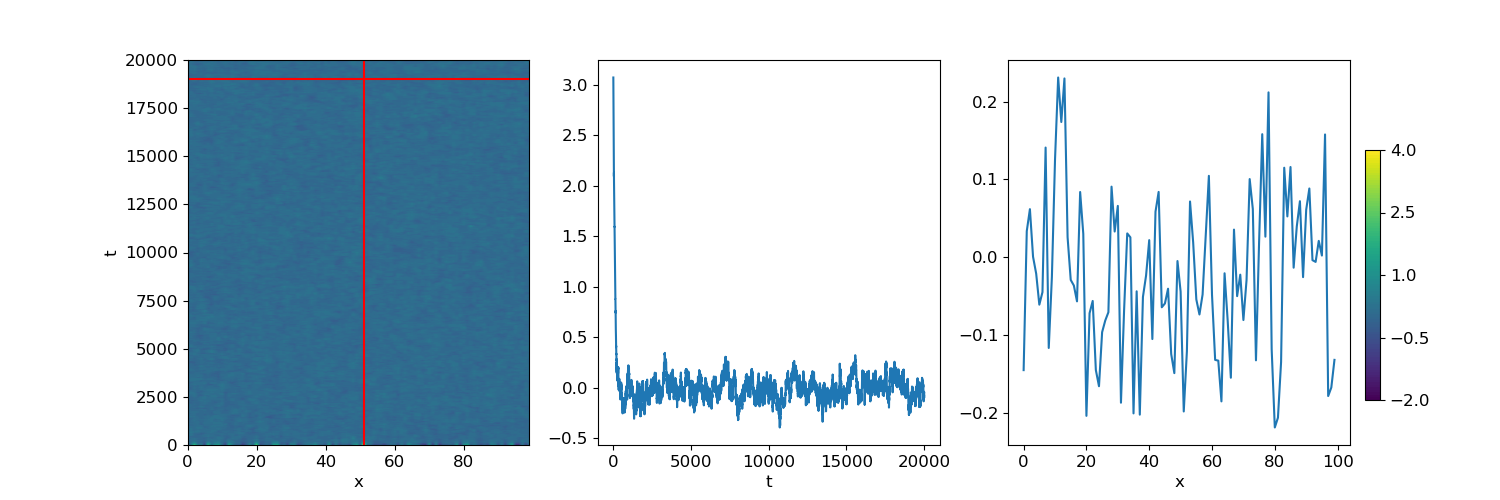

In [19]:

print(ind_real)
print('lmb_t=%.1f , lmb_s=%.1f'%(lmb_t,lmb_s))

plt.rc('font', size=12) 

xx,tt=np.meshgrid(x,t)
fig,ax=plt.subplots(1,3,figsize=(15,5))
cont=ax[0].contourf(xx,tt,Sol[ind_real][:,:].T,np.linspace(np.floor(np.min(np.min(Sol[ind_real][:,:]))),np.ceil(np.max(np.max(Sol[ind_real][:,:]))),100))
cax = plt.axes([0.91, 0.2,0.01,0.5])
ticks_cbar=np.linspace(np.floor(np.min(np.min(Sol[ind_real][:,:]))),np.ceil(np.max(np.max(Sol[ind_real][:,:]))),5)
plt.colorbar(cont,cax=cax,orientation='vertical',ticks=ticks_cbar)
ax[0].hlines(t[ind_t],0,x[-1],'r')
ax[0].vlines(x[ind_x],0,tmax,'r')
ax[0].set_xlim((0,x[-1]))
ax[0].set_ylim((0,tmax))
ax[0].set_xlabel('x')
ax[0].set_ylabel('t')
ax[1].plot(t,Sol[ind_real][ind_x,:])
ax[1].set_xlabel('t')
ax[2].plot(x,Sol[ind_real][:,ind_t])
ax[2].set_xlabel('x')
#plt.savefig("figure/noise/example.png")


In [22]:
print(type(ind_t))
Sol=np.array(Sol)

# Spatial covariance at a given time T
Spat_covariance=np.cov(np.squeeze(Sol[:,:,ind_t].T))

# Temporal covariance at a given position
Temp_covariance=np.cov(np.squeeze(Sol[:,ind_x,:].T))

# Spatial spectrum at a given time T
Spat_SP=np.zeros((n_real,N),dtype='complex')

for i in range(n_real):
    Spat_SP[i]=np.fft.fftshift(np.fft.fft(Sol[ind_real,:,ind_t]))/N
   


Spat_SP_mean=np.mean(Spat_SP,axis=0)

# Temporal spectrum at a given position
Temp_SP=np.zeros((n_real,M),dtype='complex')

for i in range(n_real):
    Temp_SP[i]=np.fft.fftshift(np.fft.fft(Sol[ind_real,ind_x,:]))/M
   
Temp_SP_mean=np.mean(Temp_SP**2,axis=0)

k=2*np.pi/L*np.arange(-N/2,N/2) #wavenumbers
omega=2*np.pi/tmax*np.arange(-M/2,M/2) #angular frequancies






<class 'numpy.int64'>


In [39]:
PS_spat_spectrum_real=np.zeros((n_real,N))

ind_t_PS=np.arange(0,200000,100)
for i in range(n_real):
    for j in range(np.shape(ind_t_PS)[0]):
        PS_spat_spectrum=np.zeros((np.shape(ind_t_PS)[0],N))
        PS_spat_spectrum[j,:]=np.abs(np.fft.fftshift(np.fft.fft(Sol[i,:,j]))/N)**2
    PS_spat_spectrum_real[i,:]=np.mean(PS_spat_spectrum,axis=0)


PS_spat_spectrum_mean=np.mean(PS_spat_spectrum_real,axis=0)


Text(0.5, 1.0, 'Spatial power spectrum at time = 19001.0')

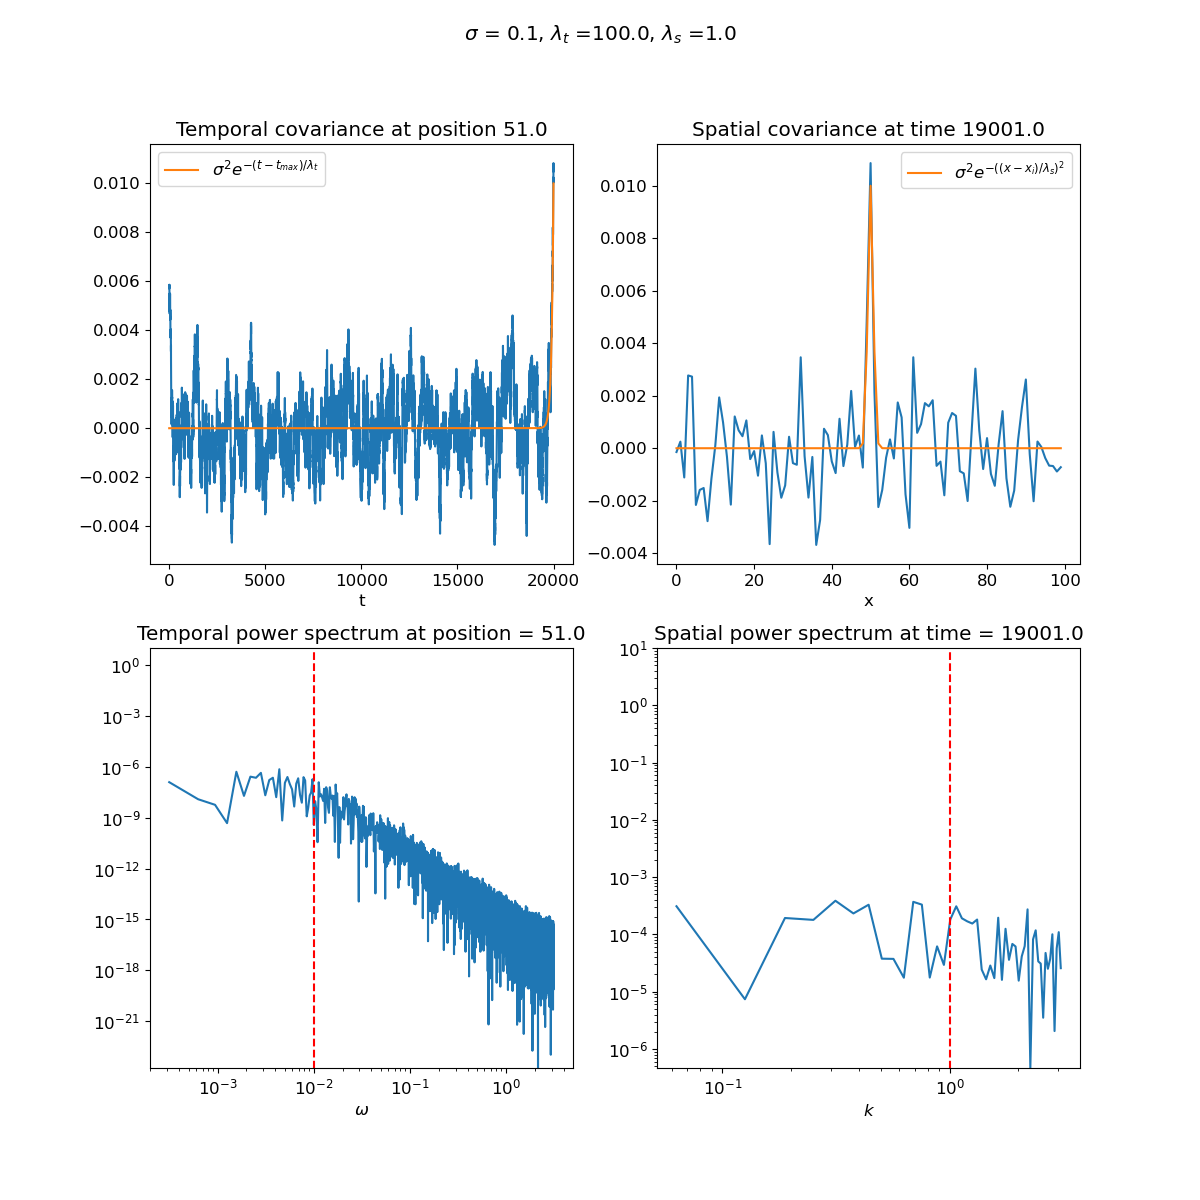

In [35]:
fig,ax=plt.subplots(2,2,figsize=(12,12))
fig.suptitle('$\sigma$ = %.1f, $\lambda_{t}$ =%.1f, $\lambda_{s}$ =%.1f'%(sigma,lmb_t,lmb_s))
ax[0,0].plot(t,Temp_covariance[-1,:])
ax[0,0].plot(t,sigma**2*np.exp(-(np.abs(t-t[-1])/lmb_t)),label='$ \sigma^2 e^{-(t-t_{max})/ \\lambda_{t}}$')
ax[0,0].set_xlabel('t')
ax[0,0].set_title('Temporal covariance at position %.1f'%(x[ind_x]))
ax[0,0].legend()
ax[0,1].plot(x,Spat_covariance[50,:])
ax[0,1].plot(x,sigma**2*np.exp(-((x-x[50])/lmb_s)**2),label='$ \sigma^2 e^{-((x-x_{i})/ \\lambda_{s})^2}$')
ax[0,1].set_xlabel('x')
ax[0,1].set_title('Spatial covariance at time %.1f'%(t[ind_t]))
ax[0,1].legend()
ax[1,0].plot(omega[int(M/2)+1:],np.abs(Temp_SP_mean[int(M/2)+1:])**2)
ax[1,0].vlines(1/lmb_t,ymin=0,ymax=100000,color='r',linestyle='dashed')
ax[1,0].set_ylim((np.min(np.abs(Temp_SP_mean[int(M/2)+1:])**2),10))
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('$\omega$')
ax[1,0].set_title('Temporal power spectrum at position = %.1f'%(x[ind_x]))
ax[1,1].plot(k[int(N/2)+1:],np.abs(Spat_SP_mean[int(N/2)+1:])**2)
ax[1,1].vlines(1/lmb_s,ymin=0,ymax=1000,color='r',linestyle='dashed')
ax[1,1].set_ylim((np.min(np.abs(Spat_SP_mean[int(N/2)+1:])**2),10))
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('$k$')
ax[1,1].set_title('Spatial power spectrum at time = %.1f'%(t[ind_t]))
#plt.savefig("figure/noise/structure.png")


/tmp/ipykernel_61125/2214459092.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(2,2,figsize=(12,12))


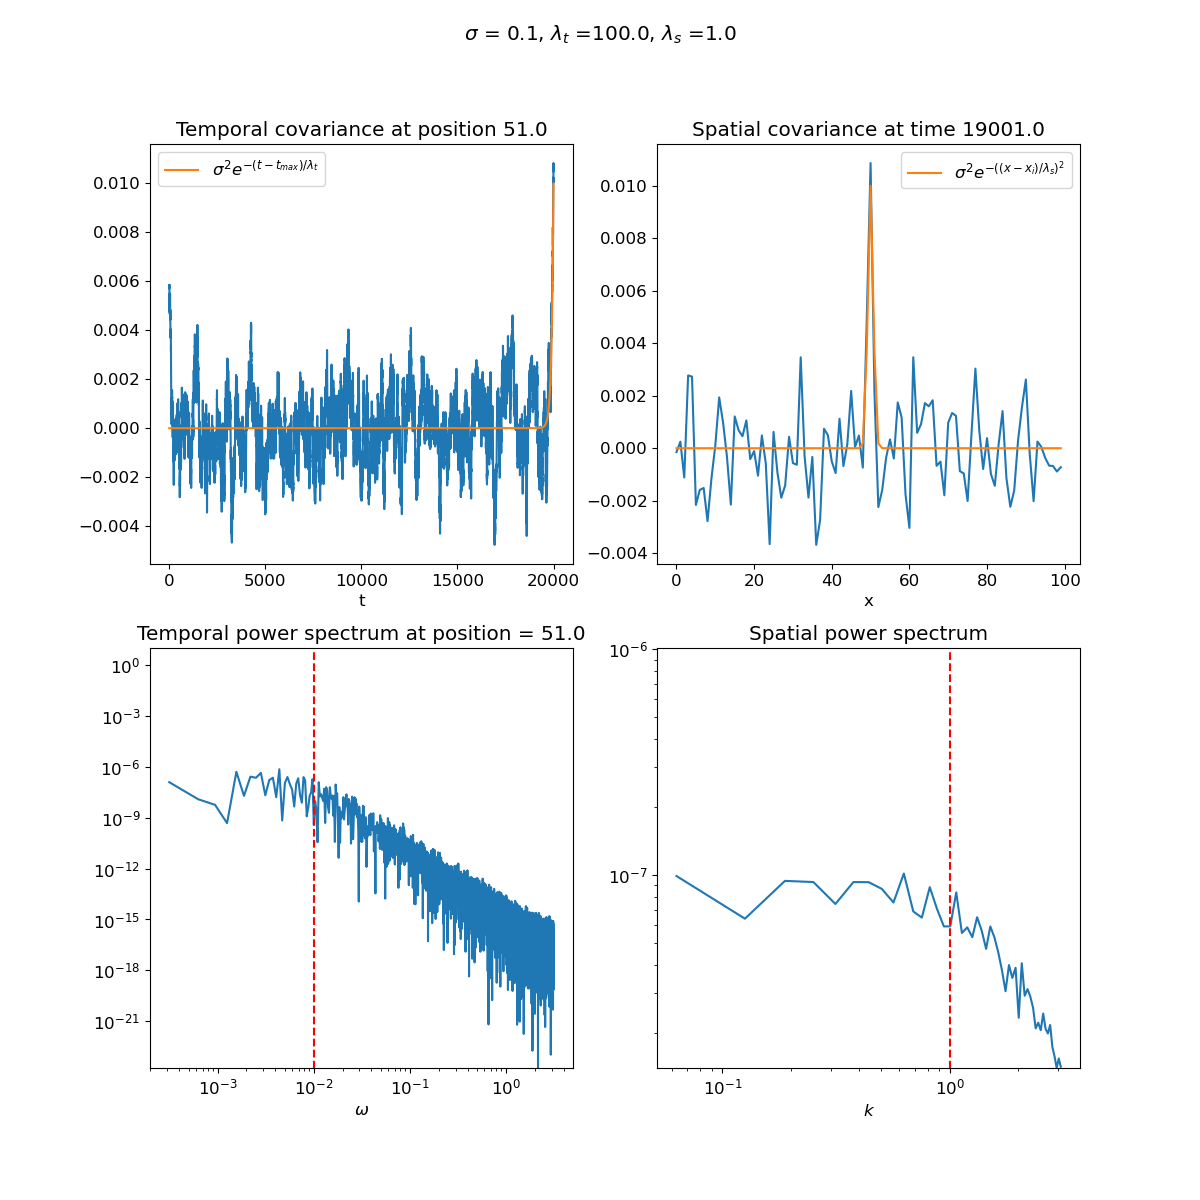

In [43]:
fig,ax=plt.subplots(2,2,figsize=(12,12))
fig.suptitle('$\sigma$ = %.1f, $\lambda_{t}$ =%.1f, $\lambda_{s}$ =%.1f'%(sigma,lmb_t,lmb_s))
ax[0,0].plot(t,Temp_covariance[-1,:])
ax[0,0].plot(t,sigma**2*np.exp(-(np.abs(t-t[-1])/lmb_t)),label='$ \sigma^2 e^{-(t-t_{max})/ \\lambda_{t}}$')
ax[0,0].set_xlabel('t')
ax[0,0].set_title('Temporal covariance at position %.1f'%(x[ind_x]))
ax[0,0].legend()
ax[0,1].plot(x,Spat_covariance[50,:])
ax[0,1].plot(x,sigma**2*np.exp(-((x-x[50])/lmb_s)**2),label='$ \sigma^2 e^{-((x-x_{i})/ \\lambda_{s})^2}$')
ax[0,1].set_xlabel('x')
ax[0,1].set_title('Spatial covariance at time %.1f'%(t[ind_t]))
ax[0,1].legend()
ax[1,0].plot(omega[int(M/2)+1:],np.abs(Temp_SP_mean[int(M/2)+1:])**2)
ax[1,0].vlines(1/lmb_t,ymin=0,ymax=100000,color='r',linestyle='dashed')
ax[1,0].set_ylim((np.min(np.abs(Temp_SP_mean[int(M/2)+1:])**2),10))
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('$\omega$')
ax[1,0].set_title('Temporal power spectrum at position = %.1f'%(x[ind_x]))
ax[1,1].plot(k[int(N/2)+1:],PS_spat_spectrum_mean[int(N/2)+1:])
ax[1,1].vlines(1/lmb_s,ymin=0,ymax=1000,color='r',linestyle='dashed')
ax[1,1].set_ylim((np.min(np.abs(PS_spat_spectrum_mean[int(N/2)+1:])),np.min(np.abs(PS_spat_spectrum_mean[int(N/2)+1:]))+0.000001))
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('$k$')
ax[1,1].set_title('Spatial power spectrum')
plt.savefig("figure/noise/structure.png")